# Text in Daten umwandeln

Das Analysieren von Text ist die Kernaufgabe von LLM-Tools wie ChatGPT.

Hierfür schauen wir uns mal ein einfaches Sprachmodell an, ein sogenanntes n-gram-Modell.

Ein n-gram ist eine Sequenz aus n Wörtern, wobei n unspezifisch ist.

n-gram-Sprachmodelle nutzen Wahrscheinlichkeiten, um das wahrscheinlichste nächste Wort
zu generieren.

Als Beispiel nehmen wir hierfür einen Text aus Projekt Gutenberg: [Der gestiefelte Kater, Kapitel 1](https://www.projekt-gutenberg.org/avenariu/kater/chap001.html), von [Ferdinand Avenarius](https://www.projekt-gutenberg.org/autoren/namen/avenariu.html)

In [1]:
# Ein paar Dependencies die wir in diesem Notebook brauchen werden:
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
filename = "./data/der-gestiefelte-kater.txt"
reader = open(filename)

# Zeilenweise einlesen
lines = reader.readlines()

# die erste Zeile ausgeben
print(lines[0])
print("%d Zeilen" % len(lines))

Der gestiefelte Kater

320 Zeilen


## Zählen von Wörtern

Wichtig für unser Modell sind die Statistiken. Wir zählen, wieviele Wörter es gibt,
wie oft kommt ein Wort wiederholt vor, und was ist das meistverwendete Wort? 

Um die Wahrscheinlichkeiten auszurechnen,
welches Wort am wahrscheinlichsten dem vorangegangenem Wort folgt, ist es
außerdem notwendig, sich Wortpaare anzuschauen.

Als ersten Schritt nehmen wir jede Zeile, entfernen Satzzeichen und verwenden die `string.split()` API.

In [3]:

def strip_punctuation(str):
    return str.translate(dict.fromkeys(map(ord, '.,"!@#$'), None)).replace("  ", " ")

line = "Komm, ... wir essen, Opa!"
schlecht_fuer_opa = strip_punctuation(line)
print("Satz, zerteilt:", line.split())
print("Satz, zerteilt und ohne Satzzeichen:", schlecht_fuer_opa.split())

Satz, zerteilt: ['Komm,', '...', 'wir', 'essen,', 'Opa!']
Satz, zerteilt und ohne Satzzeichen: ['Komm', 'wir', 'essen', 'Opa']


Die Satzzeichen bleiben erhalten. Das ist gut für Opa, aber schlecht für unser Sprachmodell. Wir können Satzzeichen über die `string.translate`-API herausfiltern. Dann gibt es noch die `string.split()`-API. Sie liefert uns ein Array zurück, und die Anzahl der Wörter in diesem Array können wir via `len()` bestimmen.

In [4]:
word_count = 0

for line in lines:
  word_count += len(strip_punctuation(line).split())

print("%d Wörter" % word_count)

3746 Wörter


Das allein hilft uns jedoch noch nicht soviel weiter. Wir wollen wissen, welches Wort wie häufig vorkommt, um daraus Wahrscheinlichkeiten für unser Sprachmodell zu errechnen. Dafür kommt ein Dictionary zum Einsatz.

In [5]:

def make_dict(lines):
    word_dict = {}
    for line in lines:
        for word in strip_punctuation(line).lower().split():
            if word in word_dict:
                word_dict[word] += 1
            else:
                word_dict[word] = 1
    
    return word_dict

Testen wir das ganze mal mit einem ganz kleinen Text:

In [6]:
print(make_dict(["Hallo, dies ist ein Test", "das ist ein sehr cooler Test."]))

{'hallo': 1, 'dies': 1, 'ist': 2, 'ein': 2, 'test': 2, 'das': 1, 'sehr': 1, 'cooler': 1}


Und wie sieht der Dictionary-Datensatz für den gestiefelten Kater aus?

1332 Wörter. Die 10 häufigsten sind:


<BarContainer object of 10 artists>

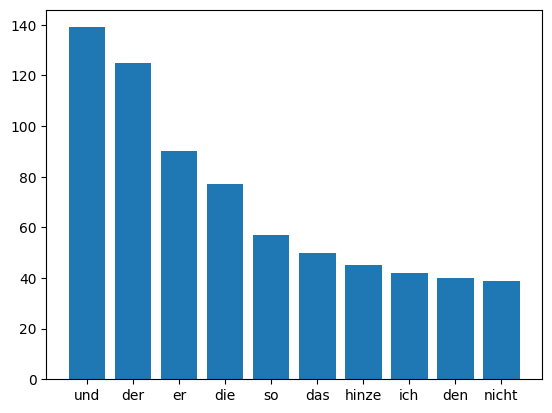

In [7]:
dict = make_dict(lines) 
top10 = sorted(dict.items(), key=lambda x: x[1], reverse=True)[:10]

keys = [k for k, _ in top10]
vals = [v for _, v in top10]

print("%d Wörter. Die 10 häufigsten sind:" % len(dict.keys()))

plt.bar(keys, vals)